In [1]:
import pandas as pd
from snowflake.snowpark.session import Session
from snowflake.snowpark.types import Variant
from snowflake.snowpark.version import VERSION

connection_parameters = {
    "account": "BPSYWTN-HEXAWARE",
    "user": "MOHAMMADA1",
    "password": "Paymatix@123!",
    "role": "SYSADMIN",
    "database": "ML_MODELS",
    "schema": "USECASES",
    "warehouse": "Paymatix_ML_WH",
}
def snowflake_connector():
    try:
        session = Session.builder.configs(connection_parameters).create()
        print("Connection Successfull!")
    except:
        raise ValueError("error while connecting with db")
    return session
session = snowflake_connector()
session.telemetry_enabled = False

snowflake_environment = session.sql('SELECT current_user(), current_version()').collect()
snowpark_version = VERSION
# Current Environment Details
print('Connection Established with the following parameters:')
print('User                        : {}'.format(snowflake_environment[0][0]))
print('Role                        : {}'.format(session.get_current_role()))
print('Database                    : {}'.format(session.get_current_database()))
print('Schema                      : {}'.format(session.get_current_schema()))
print('Warehouse                   : {}'.format(session.get_current_warehouse()))
print('Snowflake version           : {}'.format(snowflake_environment[0][1]))
print('Snowpark for Python version : {}.{}.{}'.format(snowpark_version[0],snowpark_version[1],snowpark_version[2]))

Connection Successfull!
Connection Established with the following parameters:
User                        : MOHAMMADA1
Role                        : "SYSADMIN"
Database                    : "ML_MODELS"
Schema                      : "USECASES"
Warehouse                   : "PAYMATIX_ML_WH"
Snowflake version           : 8.7.1
Snowpark for Python version : 1.8.0


## Pandas

In [3]:
import pandas as pd
df = pd.read_csv('large_dataset_creditcard.csv')

In [4]:
print(df.shape)
df.info()

(2980752, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980752 entries, 0 to 2980751
Data columns (total 31 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Time    float64
 1   V1      float64
 2   V2      float64
 3   V3      float64
 4   V4      float64
 5   V5      float64
 6   V6      float64
 7   V7      float64
 8   V8      float64
 9   V9      float64
 10  V10     float64
 11  V11     float64
 12  V12     float64
 13  V13     float64
 14  V14     float64
 15  V15     float64
 16  V16     float64
 17  V17     float64
 18  V18     float64
 19  V19     float64
 20  V20     float64
 21  V21     float64
 22  V22     float64
 23  V23     float64
 24  V24     float64
 25  V25     float64
 26  V26     float64
 27  V27     float64
 28  V28     float64
 29  Amount  float64
 30  Class   float64
dtypes: float64(31)
memory usage: 705.0 MB


In [5]:
df.describe()

Time            V1            V2            V3            V4  \
count  2.980752e+06  2.980752e+06  2.980752e+06  2.980752e+06  2.980752e+06   
mean   8.635026e+04 -4.103819e-02 -2.637183e-03  9.984741e-02  2.507685e-02   
std    4.918492e+04  1.943162e+00  1.642807e+00  1.518960e+00  1.407152e+00   
min    0.000000e+00 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%    4.344000e+04 -9.512759e-01 -5.872091e-01 -7.218087e-01 -8.274302e-01   
50%    7.537100e+04 -2.688728e-02  6.161569e-02  2.963077e-01  2.083295e-02   
75%    1.341330e+05  1.262685e+00  7.895984e-01  1.092099e+00  7.815474e-01   
max    1.727920e+05  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.980752e+06  2.980752e+06  2.980752e+06  2.980752e+06  2.980752e+06   
mean  -2.550324e-02  7.396591e-03 -1.102818e-02  7.979427e-03  6.408740e-03   
std    1.381439e+00  1.326373e+00  1.233211e+00  1.193229e+00  1.108297e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -7.135674e-01 -7.633673e-01 -5.567898e-01 -1.981482e-01 -6.569930e-01   
50%   -8.088304e-02 -2.644320e-01  2.986503e-02  3.104095e-02 -5.460980e-02   
75%    5.876113e-01  4.048631e-01  5.590292e-01  3.255517e-01  6.097920e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.980751e+06  2.980751e+06  2.980751e+06  2.980751e+06   
mean   ... -5.032968e-03 -2.254882e-02 -5.726716e-04  4.137870e-04   
std    ...  7.322354e-01  7.189345e-01  6.216478e-01  6.021310e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.274519e-01 -5.513993e-01 -1.630987e-01 -3.475028e-01   
50%    ... -3.775427e-02 -1.482656e-02 -1.532054e-02  4.111484e-02   
75%    ...  1.743941e-01  4.919971e-01  1.416306e-01  4.296285e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28        Amount  \
count  2.980751e+06  2.980751e+06  2.980751e+06  2.980751e+06  2.980751e+06   
mean   1.600830e-02 -4.051569e-03  1.436782e-04  6.017539e-04  8.925086e+01   
std    5.118182e-01  4.911560e-01  4.006016e-01  3.287814e-01  2.493226e+02   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01  0.000000e+00   
25%   -2.947838e-01 -3.314616e-01 -6.953313e-02 -4.956936e-02  5.990000e+00   
50%    3.995011e-02 -5.934778e-02  1.485263e-03  1.405148e-02  2.290000e+01   
75%    3.602057e-01  2.434136e-01  8.888966e-02  7.712619e-02  7.998000e+01   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01  2.569116e+04   

              Class  
count  2.980751e+06  
mean   1.812630e-03  
std    4.253640e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00  

[8 rows x 31 columns]

In [6]:
df.corr()

Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.119710 -0.011244 -0.419023 -0.108165  0.161411 -0.059483   
V1      0.119710  1.000000  0.001094  0.021034 -0.012315  0.004042  0.012824   
V2     -0.011244  0.001094  1.000000 -0.019503  0.009057 -0.013598  0.002671   
V3     -0.419023  0.021034 -0.019503  1.000000 -0.006498  0.025321 -0.002828   
V4     -0.108165 -0.012315  0.009057 -0.006498  1.000000 -0.005476 -0.005199   
V5      0.161411  0.004042 -0.013598  0.025321 -0.005476  1.000000  0.002079   
V6     -0.059483  0.012824  0.002671 -0.002828 -0.005199  0.002079  1.000000   
V7      0.080541  0.014441 -0.005067  0.030747 -0.008582  0.004502  0.008605   
V8     -0.036349 -0.008781  0.005739 -0.024882  0.009926 -0.009419 -0.006855   
V9     -0.029010 -0.004713  0.000568  0.019841  0.002556  0.000721  0.009199   
V10     0.038802  0.005040  0.000788  0.014992 -0.013068  0.012792  0.003287   
V11    -0.265616 -0.011879  0.005546  0.008949  0.009328 -0.004074 -0.015629   
V12     0.153705  0.003246 -0.015867  0.005295 -0.008952  0.014830 -0.003565   
V13    -0.085590  0.000813  0.008801  0.001625  0.003187  0.002205  0.003333   
V14    -0.118975  0.009139 -0.006697  0.032257 -0.002890  0.009266  0.005462   
V15    -0.164552  0.006560  0.008627 -0.016102 -0.008067  0.005996 -0.012058   
V16     0.008066  0.007021 -0.003647 -0.000515 -0.014895  0.018729 -0.002984   
V17    -0.077195  0.012668 -0.008549  0.022279  0.001219 -0.007249  0.007344   
V18     0.093265  0.004413 -0.000490 -0.006438 -0.006380  0.007213  0.008280   
V19     0.039082  0.007191  0.003031 -0.012862 -0.002701 -0.006490  0.017638   
V20    -0.053206 -0.008325 -0.012256 -0.006241  0.003939 -0.003978  0.002052   
V21     0.044866 -0.003806  0.000200 -0.001034  0.000380 -0.007839  0.004474   
V22     0.153647  0.005412 -0.002947  0.011494 -0.001809 -0.015333  0.008702   
V23     0.044718 -0.013233 -0.003849  0.007401 -0.000896  0.010441 -0.006975   
V24    -0.014612 -0.000771 -0.002521  0.003367 -0.000890 -0.002998  0.001681   
V25    -0.230120  0.018494 -0.009480 -0.009025  0.002442 -0.011991  0.010017   
V26    -0.027464  0.011859  0.000262 -0.000617 -0.001431 -0.020671  0.010567   
V27    -0.005648 -0.006804  0.005345 -0.014314  0.006532 -0.009980 -0.000712   
V28    -0.009937  0.013830 -0.003601  0.005110  0.000030  0.003925 -0.004840   
Amount -0.009803 -0.229683 -0.532204 -0.205135  0.098485 -0.384226  0.214271   
Class  -0.013066 -0.111960  0.100343 -0.212482  0.141651 -0.105824 -0.049076   

              V7        V8        V9  ...       V21       V22       V23  \
Time    0.080541 -0.036349 -0.029010  ...  0.044866  0.153647  0.044718   
V1      0.014441 -0.008781 -0.004713  ... -0.003806  0.005412 -0.013233   
V2     -0.005067  0.005739  0.000568  ...  0.000200 -0.002947 -0.003849   
V3      0.030747 -0.024882  0.019841  ... -0.001034  0.011494  0.007401   
V4     -0.008582  0.009926  0.002556  ...  0.000380 -0.001809 -0.000896   
V5      0.004502 -0.009419  0.000721  ... -0.007839 -0.015333  0.010441   
V6      0.008605 -0.006855  0.009199  ...  0.004474  0.008702 -0.006975   
V7      1.000000 -0.011713  0.003489  ... -0.003739 -0.005396  0.014784   
V8     -0.011713  1.000000 -0.007851  ... -0.005028  0.001851 -0.002473   
V9      0.003489 -0.007851  1.000000  ... -0.001407  0.008231 -0.010988   
V10     0.013797 -0.015085 -0.004574  ... -0.001323  0.001385 -0.003143   
V11    -0.007967  0.003960  0.005145  ...  0.000549 -0.011618  0.010851   
V12     0.024535 -0.009297 -0.035533  ...  0.003604  0.004909  0.005353   
V13    -0.003126 -0.001653  0.023882  ... -0.001816 -0.002041 -0.005107   
V14     0.008968 -0.005899  0.025122  ... -0.006682 -0.018882  0.006449   
V15     0.006962 -0.004770 -0.021495  ...  0.002334  0.003619 -0.002132   
V16     0.015239 -0.007430 -0.011108  ... -0.002041 -0.002799  0.001751   
V17     0.008329 -0.009565  0.031377  ... -0.003819  0.013103 -0.002283   
V18     0.007963 -0.004315

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

## Modeling

In [8]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [17]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
train_df, test_df = train_test_split(df.sample(frac=0.2, random_state=42)[:5000], test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

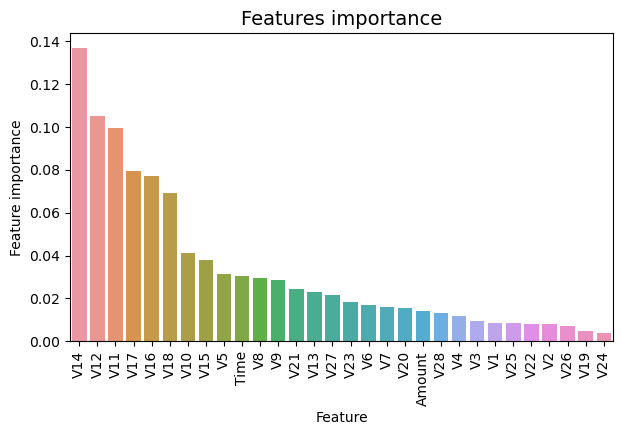

In [18]:
preds = clf.predict(valid_df[predictors])
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

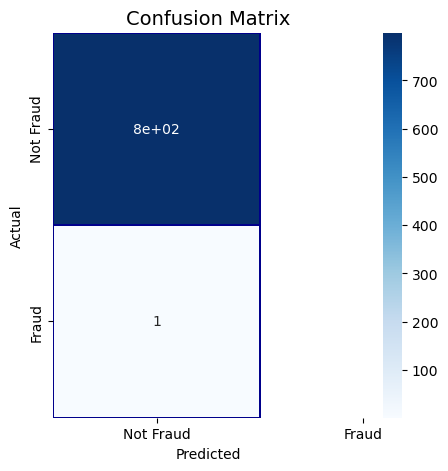

In [19]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [20]:
valid_df[predictors].head()

Time        V1        V2        V3        V4        V5        V6  \
919727   51518.0 -0.789783  1.735738  0.388468  1.021483 -0.441462 -0.316414   
1645661  34562.0  1.108935 -0.712931  0.581837 -0.072843 -0.702282  0.610832   
2867411  58663.0 -1.976657  1.718251  1.280070  1.168106 -1.687765  1.581356   
1014674  29331.0  1.198823  0.320817  0.415263  0.623758 -0.397948 -0.860622   
13691    24264.0 -1.691248  2.080000  1.131038 -0.256781  0.339663 -0.503440   

               V7        V8        V9  ...       V20       V21       V22  \
919727  -0.747872 -2.361805 -1.035415  ...  0.513803 -1.079286  0.867472   
1645661 -0.723037  0.289573  1.108592  ...  0.080899 -0.221462 -0.601892   
2867411 -1.215883 -6.233742 -1.047324  ...  0.827504 -2.010826  0.038221   
1014674 -0.000149 -0.079390 -0.266712  ... -0.065046 -0.220484 -0.666299   
13691    1.044360 -0.566609  2.757864  ...  1.098652 -0.763800 -0.887577   

              V23       V24       V25       V26       V27       V28  Amount  
919727   0.151343  0.385887 -0.185600 -0.345831 -0.069505  0.016451   12.31  
1645661 -0.133996 -0.776442  0.214433  0.991903 -0.056724  0.003707   81.58  
2867411 -0.773533  0.487594 -0.445291 -0.518876  0.216201 -0.165914  358.06  
1014674  0.139833  0.500068  0.164507  0.063764 -0.025557  0.023103    1.98  
13691   -0.003563 -0.082226  0.006344  0.011478  0.462873 -0.111138    8.95  

[5 rows x 30 columns]

In [22]:
df.shape

(2980752, 31)

In [25]:
o = clf.predict(df[predictors].dropna())

In [26]:
len(o)

2980751

In [28]:
df.columns = df.columns.str.upper()
df_snw = session.createDataFrame(df) #data=buf_data, schema=schema_buf)
df_snw.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"TIME"  |"V1"          |"V2"          |"V3"          |"V4"          |"V5"          |"V6"          |"V7"          |"V8"          |"V9"          |"V10"         |"V11"         |"V12"         |"V13"         |"V14"         |"V15"         |"V16"         |"V17"         |"V18"         |"V19"         |"V20"         |"V21"         |"V22"         |"V23"         |"V24"         |"V25"         |"V26"         |"V27"         |"V28"         |"AMOUNT"  |"CLASS"  |
------------------------------------------------------------------------------------------------

In [29]:
df_snw.write.mode("overwrite").save_as_table("TEMP_MED_TABLE")
df_snow = session.table("TEMP_MED_TABLE").to_pandas()  ## Converts Snowflake.Table to Pandas DataFrame
df_snow.head()

TIME        V1        V2        V3        V4        V5        V6  \
0  126071.0 -0.553654  0.299596  0.750077  0.044362  0.901756  0.258194   
1  126072.0  2.390738 -1.158757 -1.812538 -1.942918 -0.437614 -0.590197   
2  126072.0  1.871581 -0.506442 -1.234154  0.310176  0.120151 -0.005781   
3  126073.0  2.229215 -1.704680 -1.846887 -2.690523  0.831868  3.571697   
4  126073.0  0.030889  0.739728  0.132831 -0.784267  0.571114 -0.602495   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.630798  0.331684  0.487116  ... -0.231611 -0.607276 -0.108141 -0.910420   
1 -0.697583 -0.235930 -1.846228  ... -0.342386 -0.604595  0.164906 -1.158671   
2 -0.082634 -0.075209  0.489231  ...  0.006837 -0.030940 -0.002380 -0.995112   
3 -1.945912  0.916946 -1.319433  ... -0.327010 -0.693505  0.491515  0.628890   
4  0.831053  0.019963 -0.130055  ... -0.246503 -0.609966  0.017242 -0.439832   

        V25       V26       V27       V28  AMOUNT  CLASS  
0 -0.191700 -0.941349  0.163615  0.161530   22.09    0.0  
1 -0.078690 -0.262699 -0.029483 -0.081032    5.76    0.0  
2 -0.117822  0.251042 -0.057366 -0.055484  100.90    0.0  
3 -0.610029 -0.458889  0.049615 -0.037103   30.55    0.0  
4 -0.500714  0.148308  0.237020  0.081086    1.78    0.0  

[5 rows x 31 columns]

 ## Create Stored Procedure to deploy training code in Snowflake

In [36]:
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import joblib
from snowflake.snowpark.functions import sproc

session.clear_imports()
session.clear_packages()
session.use_schema("USECASES")
session.add_packages("snowflake-snowpark-python", "pandas", "scikit-learn", "joblib")


@sproc(name='TEMP_TRAIN_MED_MODEL', session=session, replace=True, is_permanent=True, stage_location='@ML_MODELS.USECASES.BUF_STAGE') 
def temp_train_med_model(session: Session, train_table: str, train_accuracy_threshold: float = 20, test_accuracy_threshold: float = 20, save_model: bool = True) -> Variant:
    df = session.table(train_table).to_pandas()
    df.columns = df.columns.str.upper()
    RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
    NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
    NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

    #TRAIN/VALIDATION/TEST SPLIT
    TEST_SIZE = 0.20 # test size using_train_test_split
    RANDOM_STATE = 2018

    target = 'CLASS'
    predictors = ['TIME', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
        'AMOUNT']
    train_df, test_df = train_test_split(df.sample(frac=0.2, random_state=42)[:5000], test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
    clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                                random_state=RANDOM_STATE,
                                criterion=RFC_METRIC,
                                n_estimators=NUM_ESTIMATORS,
                                verbose=False)
    clf.fit(train_df[predictors], train_df[target].values)
    preds = clf.predict(test_df[predictors])
    score = roc_auc_score(test_df[target].values, preds)
    model_saved = False
    session_put = None
    if save_model:
        if score >= train_accuracy_threshold:
            # Upload the model to a stage
                try:
                    # with tempfile.TemporaryDirectory() as model_output_dir:
                    model_output_dir = 'tmp'
                    os.makedirs(model_output_dir, exist_ok=True)
                    print(model_output_dir)
                    model_name = os.path.join(model_output_dir, "temp_med_model.joblib.gz")
                    # joblib.dump(model, model_name)
                    with open(model_name, 'wb') as model_file:
                        joblib.dump(clf, model_file)
                    session_put = session.file.put(model_name, '@ML_MODELS.USECASES.BUF_STAGE', overwrite=True)
                    model_saved = True
                except Exception as e:
                    print(e)
                    raise e
    return {
        "r2 threshold on train": train_accuracy_threshold,
        "r2 score on teet": score,
        "r2 threshold on test": test_accuracy_threshold,
        "model saved" : model_saved,
        "Total Features" : len(train_df.columns),
        "Input Feartures Required" : list(train_df.columns),
        "session_put" : session_put
    }

The version of package 'snowflake-snowpark-python' in the local environment is 1.12.0, which does not fit the criteria for the requirement 'snowflake-snowpark-python'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'joblib' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'joblib'. Your UDF might not work when the package version is different between the server and your local environment.


In [40]:
train_accuracy_threshold = 0.2
test_accuracy_threshold = 0.2
save = True
# Locally Trains the model
# local_train = temp_train_med_model(session, "TEMP_MED_TABLE", train_accuracy_threshold, test_accuracy_threshold, save)
# print(local_train)
# Calls the Stored Procedure from Snowflake to train the model
print(session.call('TEMP_TRAIN_MED_MODEL', 'TEMP_MED_TABLE', train_accuracy_threshold, test_accuracy_threshold, save))

{
  "Input Feartures Required": [
    "TIME",
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "AMOUNT",
    "CLASS"
  ],
  "Total Features": 31,
  "model saved": true,
  "r2 score on teet": 0.5,
  "r2 threshold on test": 0.2,
  "r2 threshold on train": 0.2,
  "session_put": [
    [
      "temp_med_model.joblib.gz",
      "temp_med_model.joblib.gz",
      133369,
      133376,
      "GZIP",
      "GZIP",
      "UPLOADED",
      ""
    ]
  ]
}


## Create Vectorized UDF for Batch API inference

In [104]:
from snowflake.snowpark.functions import udf
# from snowflake.snowpark.dataframe import DataFrame
session.clear_imports()
session.clear_packages()

import cachetools
# Add trained model and Python packages from Snowflake Anaconda channel available on the server-side as UDF dependencies
session.add_import('@ML_MODELS.USECASES.BUF_STAGE/temp_med_model.joblib.gz')
session.add_packages('pandas', 'joblib','cachetools','scikit-learn')

@cachetools.cached(cache={})
def load_model(filename):
    import joblib
    import sys
    import os

    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]

    if import_dir:
        with open(os.path.join(import_dir, filename), 'rb') as file:
            m = joblib.load(file)
            return m

@udf(name='TEMP_BATCH_PREDICT_MED_MODEL',session=session,replace=True,is_permanent=True,stage_location='@ML_MODELS.USECASES.BUF_STAGE')
def temp_batch_predict_med_model(data: list) -> float:
    columns = ['TIME', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
        'AMOUNT']
    # df = session.createDataFrame(data, columns=columns)
    # inferencing
    model = load_model('temp_med_model.joblib.gz')
    return model.predict([data])

The version of package 'joblib' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'joblib'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'cachetools' in the local environment is 4.2.4, which does not fit the criteria for the requirement 'cachetools'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn'. Your UDF might not work when the package version is different between the server and your local environment.


In [105]:
from snowflake.snowpark.functions import col, call_udf, array_construct
table = session.table("TEMP_MED_TABLE")
result = table.select(*list(table.columns), call_udf("TEMP_BATCH_PREDICT_MED_MODEL", array_construct(
    col('TIME'), col('V1'),  col('V2'),  col('V3'),  col('V4'),  col('V5'),  col('V6'),  col('V7'),  col('V8'),  col('V9'),  col('V10'),  col('V11'),  col('V12'),  col('V13'),  col('V14'),  col('V15'),  col('V16'),  col('V17'),  col('V18'),  col('V19'),  col('V20'),  col('V21'),  col('V22'),  col('V23'),  col('V24'),  col('V25'),  col('V26'),  col('V27'),  col('V28'),  col('AMOUNT')
    )).as_("MODEL_PREDICTION"))

In [115]:
df_out = result.to_pandas()

In [77]:
from snowflake.snowpark.dataframe import DataFrame
ls_data = df[predictors].dropna().values.tolist()

In [ ]:
print(ls_data[:2])
dff = session.createDataFrame(ls_data)

In [ ]:
dff.count()

In [79]:
l_rslt=clf.predict(ls_data)

c:\Users\affan\Programs\miniconda3\envs\buf_snowflake\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
type(ls_data)

list